el farol bar problem

In [26]:
import numpy as np
np.set_printoptions(precision=2)

Building treasure map data structure

In [27]:
# build the treasure matrix, the first element is the multiplier, the second is the amount of hunters

row0 = [
    [24, 2],
    [70, 4],
    [41, 3],
    [21, 2],
    [60, 4]
]

row1 = [
    [47, 3],
    [82, 5],
    [87, 5],
    [80, 5],
    [35, 4]
]

row2 = [
    [73, 4],
    [89, 5],
    [100, 8],
    [90, 7],
    [17, 2]
]

row3 = [
    [77, 5],
    [83, 5],
    [85, 5],
    [79, 5],
    [55, 4]
]

row4 = [
    [12, 2],
    [27, 3],
    [52, 4],
    [15, 2],
    [30, 3]
]

treasures = np.array([row0, row1, row2, row3, row4])

In [28]:
treasures

array([[[ 24,   2],
        [ 70,   4],
        [ 41,   3],
        [ 21,   2],
        [ 60,   4]],

       [[ 47,   3],
        [ 82,   5],
        [ 87,   5],
        [ 80,   5],
        [ 35,   4]],

       [[ 73,   4],
        [ 89,   5],
        [100,   8],
        [ 90,   7],
        [ 17,   2]],

       [[ 77,   5],
        [ 83,   5],
        [ 85,   5],
        [ 79,   5],
        [ 55,   4]],

       [[ 12,   2],
        [ 27,   3],
        [ 52,   4],
        [ 15,   2],
        [ 30,   3]]])

In [29]:
treasures.shape

(5, 5, 2)

In [30]:
# the value of one treasure is 7500
multiplier_value = 7500

# cost of choosing to get the jth treasure, with a max of 3 treasures per player
costs = np.array([0, 25_000, 75_000])

In [31]:
# get the expected value of all the treasures in the map given the player's assumption of everyone's choices
def get_evs(treasures, assumed_choices):
    # treasures and choices are 5x5 matrices
    island_values =  treasures[:,:,0] * multiplier_value
    number_of_hunters = treasures[:,:,1] + assumed_choices
    evs = island_values / number_of_hunters
    return evs

In [32]:
def choose_treasure(expected_values):
    # find the best 3 treasures to choose
    evs = expected_values.reshape(-1)
    top3 = np.argsort(evs)[-3:][::-1] # reverse order of the top 3 values
    top3_values = evs[top3]
    choices = []
    for i in range(3):
        if top3_values[i] - costs[i] > 0:
            choices.append(top3[i])
    return choices

evs = np.array([1,2,20_000, 50_000, 100_000])
print(choose_treasure(evs))

evs = evs = np.array([1,50_000, 2,20_000, 50_000, 100_000])
print(choose_treasure(evs))

evs = np.array([1, 75_001, 50_000, 2,20_000, 50_000, 100_000, 20_000])
print(choose_treasure(evs))

evs = np.array([1, 75_001, 50_000, 2, 20_000, 50_000, 100_000, 20_000, 75_001])
print(choose_treasure(evs))

[4, 3]
[5, 4]
[6, 1]
[6, 8, 1]


In [33]:
# scores are naive EVs based on treasure multiplier and number of hunters
# we flatten to make it easy to work with and arg sort them
flat_scores = (treasures[:,:,0] * multiplier_value / treasures[:,:,1]).flatten()
ids = np.argsort(flat_scores)
print(flat_scores)
print(ids)

[ 90000.   131250.   102500.    78750.   112500.   117500.   123000.
 130500.   120000.    65625.   136875.   133500.    93750.    96428.57
  63750.   115500.   124500.   127500.   118500.   103125.    45000.
  67500.    97500.    56250.    75000.  ]
[20 23 14  9 21 24  3  0 12 13 22  2 19  4 15  5 18  8  6 16 17  7  1 11
 10]


In [34]:
middle = flat_scores[ids[3:-8]] # middle values
print(middle.shape)
print(middle)

(14,)
[ 65625.    67500.    75000.    78750.    90000.    93750.    96428.57
  97500.   102500.   103125.   112500.   115500.   117500.   118500.  ]


In [35]:
# doesn't matter what the distribution is within the greedy 8 and anti greedy 3 because we will not choose them anyways
greedy8 = np.array([10,10,10,10,10,10,10,10]) * (60/80) # 60% of people choose top 8 islands

agreedy3 = np.array([20/3, 20/3, 20/3]) # anti greedy 3, 20% of people choose lowest 3 islands

In [36]:
ps = 100 * middle / middle.sum() # get percentage value of each score
ps = ps * ((100 - greedy8.sum() - agreedy3.sum()) / 100)

p_ids = ids[3:-8] # get the ids of the middle values

print(ps.shape)
print(ps)
print(p_ids)

(14,)
[0.98 1.01 1.12 1.18 1.35 1.41 1.45 1.46 1.54 1.55 1.69 1.73 1.76 1.78]
[ 9 21 24  3  0 12 13 22  2 19  4 15  5 18]


In [37]:
print(greedy8.sum() + agreedy3.sum() + ps.sum())

100.0


In [38]:
my_assumption = np.ones((25))
my_assumption[ids[:3]] = agreedy3
my_assumption[ids[-8:]] = greedy8
my_assumption[ids[3:-8]] = ps
my_assumption = my_assumption.reshape((5,5))
print(my_assumption)

[[1.35 7.5  1.54 1.18 1.69]
 [1.76 7.5  7.5  7.5  0.98]
 [7.5  7.5  1.41 1.45 6.67]
 [1.73 7.5  7.5  1.78 1.55]
 [6.67 1.01 1.46 6.67 1.12]]


In [39]:
evs = get_evs(treasures, my_assumption)
print(evs)
choices = choose_treasure(evs)
print(choices)

[[53745.06 45652.17 67783.15 49520.49 79135.75]
 [74033.11 49200.   52200.   48000.   52671.17]
 [47608.7  53400.   79741.77 79924.1  14711.54]
 [85791.93 49800.   51000.   87436.14 74379.34]
 [10384.62 50475.36 71407.99 12980.77 54554.88]]
[18, 15, 13]


In [40]:
sorted_evs = np.sort(evs.flatten())
print(sorted_evs)

[10384.62 12980.77 14711.54 45652.17 47608.7  48000.   49200.   49520.49
 49800.   50475.36 51000.   52200.   52671.17 53400.   53745.06 54554.88
 67783.15 71407.99 74033.11 74379.34 79135.75 79741.77 79924.1  85791.93
 87436.14]


# This is all power/normal hybrid which doesn't make sense now so ignore it :(

In [41]:
# sample from ps to get the distribution of the middle 14 islands
samples = []
for i in range(100):
    sample = np.random.choice(p_ids, 100, p=ps/ps.sum()).copy()
    counts = np.bincount(sample)/sample.size
    samples.append(counts)
samples = np.array(samples)
print(samples[0])
print(samples[0].__len__())

[0.06 0.   0.06 0.01 0.09 0.07 0.   0.   0.   0.06 0.   0.   0.12 0.04
 0.   0.07 0.   0.   0.09 0.17 0.   0.06 0.05 0.   0.05]
25


In [42]:
means = samples.mean(axis=0)
stds = samples.std(axis=0)
print(means)
print(stds)

[0.06 0.   0.08 0.05 0.09 0.09 0.   0.   0.   0.05 0.   0.   0.07 0.07
 0.   0.09 0.   0.   0.09 0.08 0.   0.05 0.08 0.   0.06]
[0.02 0.   0.03 0.03 0.02 0.02 0.   0.   0.   0.02 0.   0.   0.03 0.03
 0.   0.03 0.   0.   0.03 0.03 0.   0.02 0.03 0.   0.02]


[0.04 0.04 0.04 0.04 0.05 0.04 0.04 0.04 0.05 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.05 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.05 0.04 0.04 0.05 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.05 0.04 0.04 0.05 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.05 0.04 0.04 0.04 0.04 0.04
 0.04 0.04]


(array([ 0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        87.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
        0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
        0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
        0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
        0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]),
 <BarContainer object of 50 artists>)

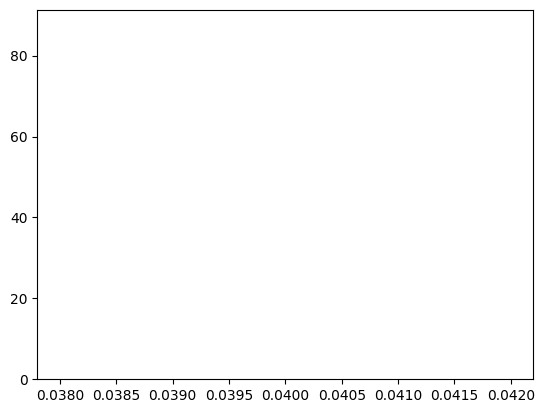

In [43]:
# plot the distribution of the mean of the samples
import matplotlib.pyplot as plt
sample_means = samples.mean(axis=1)
sample_sds = samples.std(axis=1)
print(sample_sds)
plt.hist(sample_means, bins=50)



In [44]:
# for each value in middle, calculate the probability of it being chosen given the normal distribution of the middle 14 islands
# we will use the normal distribution of the samples of middle 14 islands to calculate the pdf of each island being chosen
from scipy.stats import norm
from scipy.stats import beta

def get_pdf(x, mean, sd):
    return norm.pdf(x, mean, sd)

def get_beta_pdf(x, a, b):
    return beta.pdf(x, a, b)

pdfs = []

for i in range(len(middle)):
    pdf = get_pdf(middle[i], sample_means.mean(), sample_means.std())
    pdfs.append(pdf)
pdfs = np.array(pdfs)

print(pdfs)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [45]:
middle

array([ 65625.  ,  67500.  ,  75000.  ,  78750.  ,  90000.  ,  93750.  ,
        96428.57,  97500.  , 102500.  , 103125.  , 112500.  , 115500.  ,
       117500.  , 118500.  ])

In [46]:
my_assumption = np.ones((25))
my_assumption[ids[:3]] = agreedy3
my_assumption[ids[-8:]] = greedy8
my_assumption[ids[3:-8]] = ps
my_assumption = my_assumption.reshape((5,5))
print(my_assumption)

[[1.35 7.5  1.54 1.18 1.69]
 [1.76 7.5  7.5  7.5  0.98]
 [7.5  7.5  1.41 1.45 6.67]
 [1.73 7.5  7.5  1.78 1.55]
 [6.67 1.01 1.46 6.67 1.12]]


In [47]:
treasures[:,:,1]

array([[2, 4, 3, 2, 4],
       [3, 5, 5, 5, 4],
       [4, 5, 8, 7, 2],
       [5, 5, 5, 5, 4],
       [2, 3, 4, 2, 3]])

In [48]:
treasures[:,:,0]

array([[ 24,  70,  41,  21,  60],
       [ 47,  82,  87,  80,  35],
       [ 73,  89, 100,  90,  17],
       [ 77,  83,  85,  79,  55],
       [ 12,  27,  52,  15,  30]])

In [51]:
flat_scores.reshape((5,5))

array([[ 90000.  , 131250.  , 102500.  ,  78750.  , 112500.  ],
       [117500.  , 123000.  , 130500.  , 120000.  ,  65625.  ],
       [136875.  , 133500.  ,  93750.  ,  96428.57,  63750.  ],
       [115500.  , 124500.  , 127500.  , 118500.  , 103125.  ],
       [ 45000.  ,  67500.  ,  97500.  ,  56250.  ,  75000.  ]])

In [55]:
grid_scores = flat_scores.reshape((5,5))
# get the indices of the top 3 scores
top_indices = np.argpartition(flat_scores, -3)[-3:]

# get the top 3 score values
top_scores = flat_scores[top_indices]
top_indices

array([ 1, 10, 11])

In [62]:
# get the indices of the top 3 scores
top_indices = np.argpartition(flat_scores, -3)[-3:]

# convert the linear indices to grid indices
top_grid_indices = np.unravel_index(top_indices, grid_scores.shape)

# get the top 3 score values from the grid
top_scores = grid_scores[top_grid_indices]
print(top_scores)
print(top_indices)

[131250. 136875. 133500.]
[ 1 10 11]


In [64]:
# get the indices of the top 3 scores
top_indices = np.argsort(flat_scores)[-3:]

# convert the linear indices to grid indices
top_grid_indices = np.unravel_index(top_indices, (5,5))

# create a new matrix with the top 3 scores and the rest as 0
new_matrix = np.zeros((5,5))
new_matrix[top_grid_indices] = flat_scores[top_indices]
new_matrix

array([[     0., 131250.,      0.,      0.,      0.],
       [     0.,      0.,      0.,      0.,      0.],
       [136875., 133500.,      0.,      0.,      0.],
       [     0.,      0.,      0.,      0.,      0.],
       [     0.,      0.,      0.,      0.,      0.]])